# Visualizations

In [16]:
import json
import matplotlib.pyplot as plt
import pandas as pd

from decouple import config
from flask import Flask
from flask_sqlalchemy import SQLAlchemy
from math import pi

In [2]:
user = config('POSTGRES_USER')
pw = config('POSTGRES_PW')
url = config('POSTGRES_URL')
db = config('POSTGRES_DB')
DB_URL = f'postgresql+psycopg2://{user}:{pw}@{url}/{db}'

In [3]:
app = Flask(__name__)
app.config['SQLALCHEMY_DATABASE_URI'] = DB_URL
DB = SQLAlchemy(app)

C:\Users\Me\Anaconda3\lib\site-packages\flask_sqlalchemy\__init__.py:835: FSADeprecationWarning: SQLALCHEMY_TRACK_MODIFICATIONS adds significant overhead and will be disabled by default in the future.  Set it to True or False to suppress this warning.
  'SQLALCHEMY_TRACK_MODIFICATIONS adds significant overhead and '


In [4]:
DB.Model.metadata.reflect(DB.engine)

In [5]:
class Track(DB.Model):
    __table__ = DB.Model.metadata.tables['track']
    
    def to_array(self):
        return np.array([self.acousticness_scaled, 
                         self.danceability_scaled, 
                         self.duration_ms_scaled,
                         self.energy_scaled, 
                         self.instrumentalness_scaled, 
                         self.key_scaled, 
                         self.liveness_scaled, 
                         self.loudness_scaled, 
                         self.mode_scaled, 
                         self.speechiness_scaled, 
                         self.tempo_scaled, 
                         self.time_signature_scaled, 
                         self.valence_scaled, 
                         self.popularity_scaled, 
                         self.alternative_rnb, 
                         self.atl_hip_hop,
                         self.banda,
                         self.baroque,
                         self.big_room,
                         self.brostep,
                         self.cali_rap,
                         self.ccm,
                         self.chamber_pop,
                         self.chillhop,
                         self.classical,
                         self.classical_era,
                         self.contemporary_country,
                         self.dance_pop,
                         self.early_music,
                         self.early_romantic_era,
                         self.edm,
                         self.electro_house,
                         self.electropop,
                         self.emo_rap,
                         self.folk_pop,
                         self.gangster_rap,
                         self.german_baroque,
                         self.grupera,
                         self.hip_hop,
                         self.indie_folk,
                         self.indie_pop,
                         self.indie_poptimism,
                         self.indie_rnb,
                         self.indie_rock,
                         self.indie_soul,
                         self.indietronica,
                         self.k_pop,
                         self.latin,
                         self.lo_fi_beats,
                         self.mellow_gold,
                         self.melodic_rap,
                         self.modern_rock,
                         self.neo_mellow,
                         self.norteno,
                         self.pop,
                         self.pop_edm,
                         self.pop_rap,
                         self.pop_rock,
                         self.post_teen_pop,
                         self.progressive_house,
                         self.progressive_trance,
                         self.ranchera,
                         self.rap,
                         self.regional_mexican,
                         self.regional_mexican_pop,
                         self.rock,
                         self.sleep,
                         self.soft_rock,
                         self.southern_hip_hop,
                         self.stomp_and_holler,
                         self.trance,
                         self.trap_music,
                         self.tropical_house,
                         self.underground_hip_hop,
                         self.uplifting_trance,
                         self.vapor_trap,
                         self.classical_super,
                         self.country_super,
                         self.folk_super,
                         self.house_super,
                         self.indian_super,
                         self.indie_super,
                         self.jazz_super,
                         self.latin_super,
                         self.metal_super,
                         self.rap_super,
                         self.reggae_super,
                         self.rock_super,
                         self.worship_super])

    def to_dict(self):
        return {'track_id': self.track_id,
                'track_name': self.track_name,
                'artist_name': self.artist_name,
                'acousticness': self.acousticness,
                'danceability': self.danceability,
                'duration_ms': self.duration_ms,
                'energy': self.energy,
                'instrumentalness': self.instrumentalness,
                'key': self.key,
                'liveness': self.liveness,
                'loudness': self.loudness,
                'mode': self.mode,
                'speechiness': self.speechiness,
                'tempo': self.tempo,
                'time_signature': self.time_signature,
                'valence': self.valence,
                'popularity': self.popularity}

    def __repr__(self):
        return json.dumps(self.to_dict())

In [25]:
q1 = Track.query.filter(Track.id == 6535).first()

In [26]:
print(q1)

{"track_id": "1IVJDJy9rWFAynjhta7l2J", "track_name": "2 Cz\u00e1rd\u00e1s, S. 225: No. 1, Cz\u00e1rd\u00e1s", "artist_name": "Franz Liszt", "acousticness": 0.99, "danceability": 0.315, "duration_ms": 88707, "energy": 0.324, "instrumentalness": 0.935, "key": 6, "liveness": 0.086, "loudness": -17.166, "mode": 1, "speechiness": 0.0534, "tempo": 108.02, "time_signature": 4, "valence": 0.079, "popularity": 4}


In [29]:
q2 = Track.query.filter(Track.track_id == '5w9c2J52mkdntKOmRLeM2m').first()

In [30]:
print(q2)

{"track_id": "5w9c2J52mkdntKOmRLeM2m", "track_name": "Con Calma", "artist_name": "Daddy Yankee", "acousticness": 0.11, "danceability": 0.737, "duration_ms": 193227, "energy": 0.86, "instrumentalness": 1.94e-06, "key": 8, "liveness": 0.0574, "loudness": -2.6519999999999997, "mode": 0, "speechiness": 0.0593, "tempo": 93.98899999999999, "time_signature": 4, "valence": 0.6559999999999999, "popularity": 100}


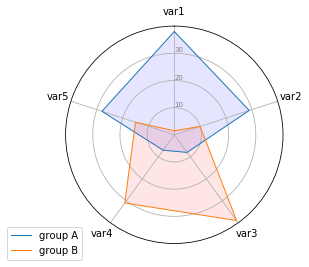

In [17]:
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})

In [33]:
df = pd.DataFrame([q1.to_dict(), q2.to_dict()])

In [51]:
df = df[['track_id', 'track_name', 'artist_name', 'mode',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'speechiness',
 'valence']]

In [52]:
categories=list(df)[4:]
N = len(categories)
print(categories)

['danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']


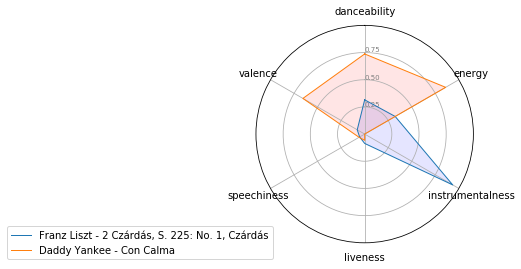

In [57]:
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[4:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.25,0.50,0.75], ["0.25","0.50","0.75"], color="grey", size=7)
plt.ylim(0,1)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
label_a = df.loc[0]['artist_name'] + ' - ' + df.loc[0]['track_name']
values=df.loc[0].drop(['track_id', 'track_name', 'artist_name', 'mode']).values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=label_a)
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
label_b = df.loc[1]['artist_name'] + ' - ' + df.loc[1]['track_name']
values=df.loc[1].drop(['track_id', 'track_name', 'artist_name', 'mode']).values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=label_b)
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1));